<h1 style="color: rgb(0, 91, 94);">$t$-Tests</h1>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />


In this notebook, you will learn about $t$-Tests. Once you get to the end you should be able to:

1. Explain the kind of problems for which $t$-Tests are commonly used.
2. Visualise a problem suited to $t$-Tests using plots.
3. Run a $t$-Test using code.
4. List the simple steps behind calculating a $t$ statistics from a sample.

<h2 style="color: rgb(0, 91, 94);">Introduction</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

$t$-tests are among the most common statistical tests performed in world.

This notebook focuses on the practicalities of performing $t$-tests in Python.

For information about the $t$-test itself, I recommend reading [Laerd Statistics's Independent t-test using SPSS Statistics](https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php).

<h2 style="color: rgb(0, 91, 94);">Packages</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

One of Python's strengths is the quality of numerical packages available.

In [1]:
# Efficient numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Alternative statistics package.
import statsmodels.stats.weightstats as stat

# Mains statistics package.
import scipy.stats as ss

# Plotting.
import matplotlib.pyplot as plt

# Fancier plotting.
import seaborn as sns

# Better sized plots.
plt.rcParams['figure.figsize'] = (12, 8)

# Nicer colours and styles for plots.
plt.style.use("ggplot")

<h2 style="color: rgb(0, 91, 94);">Simulated Data</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

We can create fake data sets with specific properties to investigate numerical methods.

In [2]:
# Parameters for two different lists of numbers.
m_a, s_a, m_b, s_b = 1.0, 0.4, 2.0, 0.4
# Sample size.
N = 40

# Create two lists of numbers based on bell-shaped probability curves.
a = np.random.normal(loc=m_a, scale=s_a, size=N)
b = np.random.normal(loc=m_b, scale=s_b, size=N)

# Stick both samples in one data frame.
df = pd.DataFrame({'Category': ['A'] * len(a) + ['B'] * len(b), 'Value': np.hstack([a,b])})

# We can look directly at the list of numbers, but it's not very illuminating.
df

,Category,Value
0,A,0.691815
1,A,1.441354
2,A,0.922411
3,A,0.518922
4,A,1.455218
...,...,...
75,B,1.253550
76,B,1.768321
77,B,1.819497
78,B,1.965869


<h2 style="color: rgb(0, 91, 94);">Visualisation</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

A good plot can quickly show us what the numbers look like.

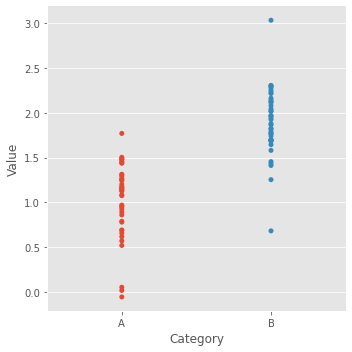

In [3]:
# One type of plot available in seaborn.
sns.catplot(x='Category', y='Value', jitter=False, data=df);

<h2 style="color: rgb(0, 91, 94);">The $t$-Test</h2>


<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Running a t-test in Python is done with a single function call. You can use scipy or statsmodels, amongst others.

In [4]:
# The scipy.stats version.
t_ss, p_ss = ss.ttest_ind(a, b)
print(f"t-value: {t_ss}\tp-value: {p_ss}")
print(f"P_scipy: {p_ss:0.2f}")

t-value: -9.813159183144828	p-value: 2.8861646635149696e-15
P_scipy: 0.00


In [5]:
# The statsmodels version.
t_sm, p_sm, d_sm = stat.ttest_ind(a, b)
print(f"t-value: {t_sm}\tp-value: {p_sm}\tDeg Free: {d_sm}")
print(f"P_statsmodels: {p_sm:0.2f}")

t-value: -9.813159183144823	p-value: 2.8861646635150426e-15	Deg Free: 78.0
P_statsmodels: 0.00


<h2 style="color: rgb(0, 91, 94);">Populations</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

$t$-tests perform calculations on samples from two populations to test whether the populations are likely similar.

In the real world, we only see the samples and we cannot see the populations.

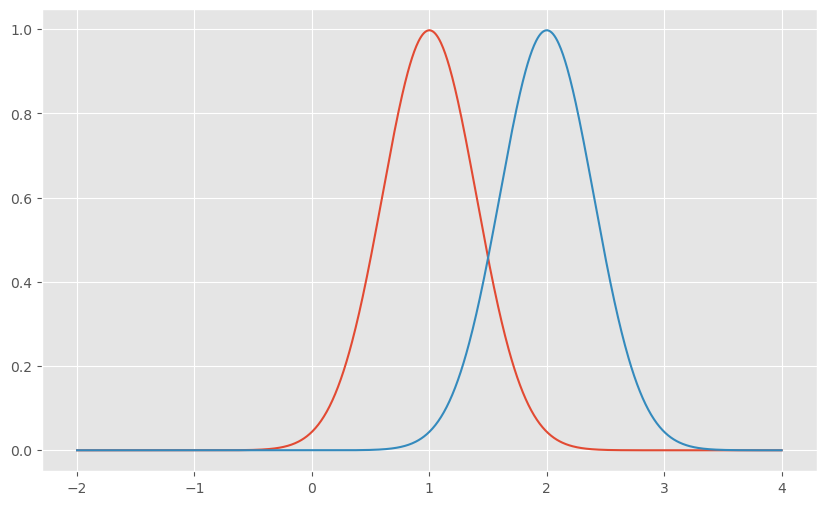

In [6]:
# Let's create a plot with the following x values.
x = np.linspace(-2.0, 4.0, 1000)

# We'll have plots of two different populations on one set of axes.
y_a = ss.norm.pdf(x, m_a, s_a)
y_b = ss.norm.pdf(x, m_b, s_b)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, y_a)
ax.plot(x, y_b)

plt.show()

<h2 style="color: rgb(0, 91, 94);">Critical Value</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

The critical value is used to make a decision regarding the calculation of the $t$ statistic from the samples.

If the probability of seeing such a $t$ value given the hypothesis that there is no difference between the means is low, then data is suggesting that you should reject that hypothesis.

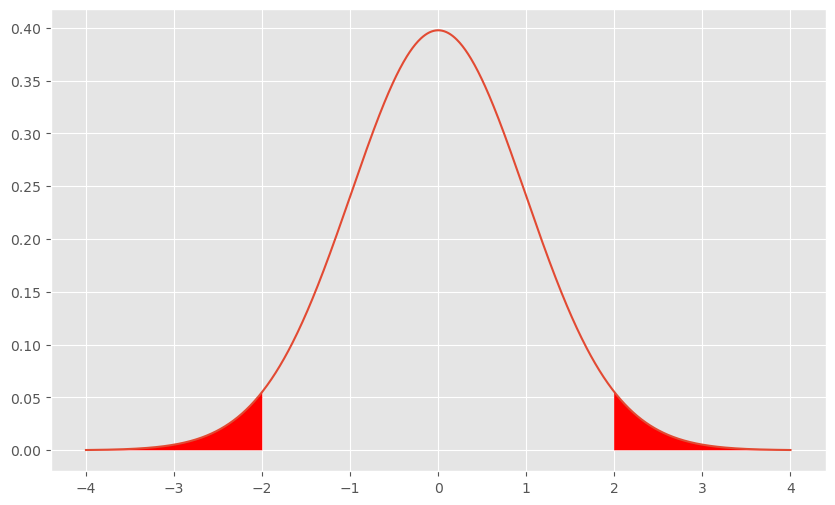

In [7]:
# This code just builds the plot below.

x_t = np.linspace(-4.0, 4.0, 1000)
t = ss.t.pdf(x_t, d_sm)
tf = pd.DataFrame({'x': x_t, 't': t})

tcrit = abs(ss.t.ppf(0.025, d_sm))
one = tf[tf['x'] >= tcrit]
two = tf[tf['x'] <= -tcrit]

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x_t, t)
ax.fill_between(one['x'], one['t'], 0, facecolor="red")
ax.fill_between(two['x'], two['t'], 0, facecolor="red")

plt.show()

<h2 style="color: rgb(0, 91, 94);">Type I errors - False Positives</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

In [8]:
# Let's run 10000 t-tests where the means are equal.
# We should make the wrong decision (reject the hypothesis) (100 * critical) percent of the time.

trials = 10000
N = 100
m_a, m_b, s = 2.0, 2.0, 0.3
rejects = 0
critical = 0.05

for i in range(trials):
    a = np.random.normal(loc=m_a, scale=s, size=N)
    b = np.random.normal(loc=m_b, scale=s, size=N)
    if ss.ttest_ind(a, b)[1] <= critical:
        rejects = rejects + 1

typei = 100.0 * (rejects / trials)
print(f"{typei:0.2f}%")

4.74%


<h2 style="color: rgb(0, 91, 94);">Type II errors - False Negatives</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

The chance of a false negative is harder to quantify.

It depends on how close the means are.

In [9]:
trials = 10000
N = 100
m_a, m_b, s = 2.0, 2.1, 0.3
dont = 0

for i in range(trials):
    a = np.random.normal(loc=m_a, scale=s, size=N)
    b = np.random.normal(loc=m_b, scale=s, size=N)
    if ss.ttest_ind(a, b)[1] > 0.05:
        dont = dont + 1

typeii = 100.0 * (dont / trials)
print(f"{typeii:0.2f}%")

35.04%


<h2 style="color: rgb(0, 91, 94);">Paired Samples</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Here we try a slightly different $t$ test - one based on repeated measures.

*References for this section:*
***

[Vincent Arel-Bundock's R datasets list](https://vincentarelbundock.github.io/Rdatasets/articles/data.html)

[t-test: Comparing Group Means](https://uc-r.github.io/t_test)

In [10]:
dfsleep = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/sleep.csv")
dfsleep

,Unnamed: 0,extra,group,ID
0,1,0.7,1,1
1,2,-1.6,1,2
2,3,-0.2,1,3
3,4,-1.2,1,4
4,5,-0.1,1,5
5,6,3.4,1,6
6,7,3.7,1,7
7,8,0.8,1,8
8,9,0.0,1,9
9,10,2.0,1,10


In [11]:
drugA = dfsleep[dfsleep["group"] == 1]
drugA = drugA.sort_values("ID")
drugA = drugA["extra"].to_numpy()
drugA

array([ 0.7, -1.6, -0.2, -1.2, -0.1,  3.4,  3.7,  0.8,  0. ,  2. ])

In [12]:
drugB = dfsleep[dfsleep["group"] == 2]
drugB = drugB.sort_values("ID")
drugB = drugB["extra"].to_numpy()
drugB

array([ 1.9,  0.8,  1.1,  0.1, -0.1,  4.4,  5.5,  1.6,  4.6,  3.4])

In [13]:
ss.ttest_rel(drugA, drugB)

Ttest_relResult(statistic=-4.062127683382037, pvalue=0.00283289019738427)

In [14]:
ss.ttest_1samp(drugB - drugA, 0)

Ttest_1sampResult(statistic=4.062127683382037, pvalue=0.00283289019738427)

In [15]:
stat.DescrStatsW(drugB - drugA).ttest_mean(0)

(4.062127683382037, 0.00283289019738427, 9.0)

<h2 style="color: rgb(0, 91, 94);">Samples and Populations</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

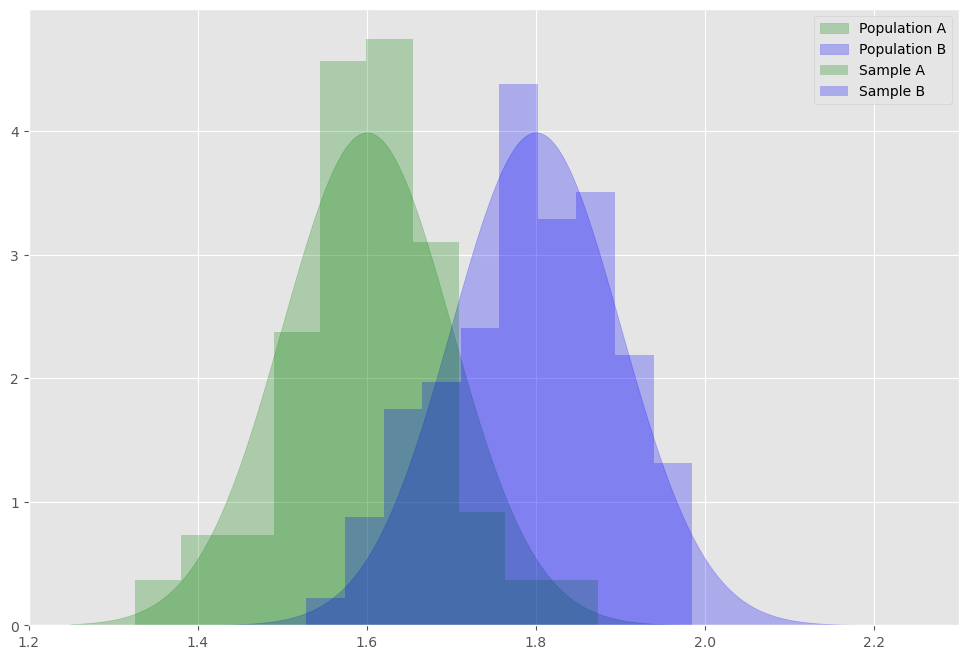

In [16]:
# Set parameters for two populations.
popA = {'m': 1.6, 's': 0.1}
popB = {'m': 1.8, 's': 0.1}

# Create two samples, one from each population.
sampA = np.random.normal(popA['m'], popA['s'], 100)
sampB = np.random.normal(popB['m'], popB['s'], 100)

# x values for plotting.
x = np.linspace(1.25, 2.25, 1000)

# The probability density functions (PDFs) for the two populations.
pdfA = ss.norm.pdf(x, popA['m'], popA['s'])
pdfB = ss.norm.pdf(x, popB['m'], popB['s'])

# Plot the population PDFs as shaded regions.
plt.fill_between(x, pdfA, color='g', alpha=0.25, label="Population A")
plt.fill_between(x, pdfB, color='b', alpha=0.25, label="Population B")

# Plot histograms of the two samples.
plt.hist(sampA, density=True, color='g', alpha=0.25, label="Sample A")
plt.hist(sampB, density=True, color='b', alpha=0.25, label="Sample B")

# Display a legend.
plt.legend()
plt.show()

<h2 style="color: rgb(0, 91, 94);">Problems with multiple $t$-tests</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Suppose we want to compare three groups. Can three $t$ tests be run in parallel?

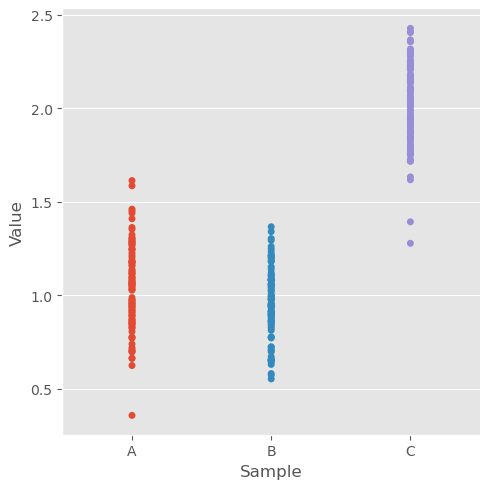

In [17]:
# Size of each sample.
N = 100

# Create three samples.
sampA = np.random.normal(1.0, 0.2, N)
sampB = np.random.normal(1.0, 0.2, N)
sampC = np.random.normal(2.0, 0.2, N)

# Put samples in a single data frame.
sample = ['A'] * N + ['B'] * N + ['C'] * N
values = np.hstack([sampA, sampB, sampC])
dfsamps = pd.DataFrame({'Sample': sample, 'Value': values})

# Visualise samples.
sns.catplot(x='Sample', y='Value', jitter=False, data=dfsamps);

In [18]:
# t-Tests
t_AB, p_AB = ss.ttest_ind(sampA, sampB)
t_AC, p_AC = ss.ttest_ind(sampA, sampC)
t_BC, p_BC = ss.ttest_ind(sampB, sampC)

print(f"p_AB: {p_AB:.2f}\tp_AC: {p_AC:.2f}\tp_BC: {p_BC:.2f}")

p_AB: 0.00	p_AC: 0.00	p_BC: 0.00


In [19]:
# Let's run 1000 tests, remembering our Type I errors.

falsepos = 0

for i in range(1000):
    A = np.random.normal(1.0, 0.2, N)
    B = np.random.normal(1.0, 0.2, N)
    C = np.random.normal(1.0, 0.2, N)
    t_AB, p_AB = ss.ttest_ind(A, B)
    t_AC, p_AC = ss.ttest_ind(A, C)
    t_BC, p_BC = ss.ttest_ind(B, C)
    if p_AB <= 0.05 or p_AC <= 0.05 or p_BC <= 0.05:
        falsepos = falsepos + 1

print(f"False positive rate: {falsepos / 10}%")

False positive rate: 12.8%


<h2 style="color: rgb(0, 91, 94);">Analaysis of Variance (ANOVA)</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

ANOVA can be used to avoid a higher Type I error rate.


In [20]:
F, P = ss.f_oneway(sampA, sampB, sampC)
print(f"{P:.2f}")

0.00


<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<h2 style="color: rgb(0, 91, 94);">End</h2>